The GPT-2 based system implementation is based on by gpt-2-simple package by Max Woolf

In [ ]:
#Importing libraries
import json
from pathlib import Path
from sklearn.model_selection import train_test_split

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


preprocessing


In [ ]:
#loading squad-2 dataset
!pip install datasets
from datasets import load_dataset
import pandas as pd

dataset = load_dataset('squad_v2')
train_dataset = dataset['train']

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.0 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

Transforming the QA dataset for the language modeling task

In [ ]:
#Creating a new file with question and answers only
with open(r"/content/drive/My Drive/dataset.txt", "w") as file:
 for row in train_dataset:
    answers = row['answers']
    for i in range(len(answers['text'])):
        file.write(row['question'] + '\n')
        file.write(answers['text'][i]+'\n')
        file.write('\n')

In [ ]:
#Splitting the QA pairs
path = Path('/content/drive/My Drive/dataset.txt')
data = path.read_text(encoding='utf-8').split('\n\n')[:-1]

In [ ]:
#Splitting the data into train and validation
train, val = train_test_split(data, test_size=0.2, shuffle=True)

In [ ]:
#Saving both as *.txt
with open(r"/content/drive/My Drive/train.txt", "w") as file:
  for pair in train:
    file.write(pair + '\n')
    file.write('\n')

with open(r"/content/drive/My Drive/val.txt", "w") as file:
  for pair in val:
    file.write(pair + '\n')
    file.write('\n')

model

In [ ]:
#importing libraries
%tensorflow_version 2.x
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from collections import Counter

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
  Preparing metadata (setup.py) ... done


In [ ]:
#Initializing the model
#GPT-2 with 124 million parameter was used
gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 5.14Git/s]                                                     
Fetching encoder.json: 1.05Mit [00:00, 5.99Mit/s]
Fetching hparams.json: 1.05Mit [00:00, 5.73Git/s]                                                   
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:07, 68.8Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 3.06Git/s]                                               
Fetching model.ckpt.meta: 1.05Mit [00:00, 7.81Mit/s]
Fetching vocab.bpe: 1.05Mit [00:00, 6.78Mit/s]


In [ ]:
#Later it will possible to save GPT-2 weights in the Drive
gpt2.mount_gdrive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model fine-tuning


In [ ]:
#Defining the file with the training data
file_name = "/content/drive/My Drive/train.txt"

In [ ]:
#Setting the fine-tuning parameters and starting the training session
sess = gpt2.start_tf_sess()
gpt2.finetune(
              sess,
              dataset=file_name, # path to the the training data
              model_name='124M', # GPT-2 with 124 million parameters was chosen
              steps=3000, # number of training steps
              restore_from='fresh',
              run_name='run1',
              print_every=10,
              sample_every=200,
              save_every=500,
              sample_length=70,
              learning_rate=0.001
              )


Loading checkpoint models/124M/model.ckpt
Loading dataset...


100%|██████████| 1/1 [00:07<00:00,  7.04s/it]


dataset has 1417572 tokens
Training...
[10 | 28.99] loss=4.58 avg=4.58
[20 | 49.73] loss=3.92 avg=4.25
[30 | 70.76] loss=3.42 avg=3.97
[40 | 92.14] loss=3.44 avg=3.84
[50 | 113.85] loss=3.53 avg=3.77
[60 | 135.66] loss=3.33 avg=3.70
[70 | 157.25] loss=3.17 avg=3.62
[80 | 178.79] loss=3.45 avg=3.60
[90 | 200.42] loss=3.26 avg=3.56
[100 | 222.11] loss=2.96 avg=3.50
[110 | 243.77] loss=3.32 avg=3.48
[120 | 265.38] loss=3.07 avg=3.44
[130 | 287.04] loss=3.04 avg=3.41
[140 | 308.73] loss=2.95 avg=3.37
[150 | 330.42] loss=3.06 avg=3.35
[160 | 352.11] loss=3.09 avg=3.33
[170 | 373.78] loss=2.94 avg=3.31
[180 | 395.43] loss=3.05 avg=3.29
[190 | 417.07] loss=3.06 avg=3.28
[200 | 438.71] loss=2.61 avg=3.24
======== SAMPLE 1 ========
 

A single man's perspective on his own actions, rather than what others are involved, is what? 
personal

In what film did Universal Pictures collaborate on a worldwide production deal?
Skyfall

Who was the most successful foreign leader of the USSR with what count

Instructions for updating:
Use standard file APIs to delete files with this prefix.


======== SAMPLE 1 ========
 Woods was killed alongside Sir Henry R. Brown?
a new governor General George Washington

What did the National Committee of LIberation discover about the relief effort?
the nature of the damage

What has been popular since the  topless bar?
snooker

What is the German name for Schwyz?
Schwi

[1010 | 2205.86] loss=1.57 avg=2.31
[1020 | 2227.60] loss=1.77 avg=2.30
[1030 | 2249.35] loss=2.09 avg=2.30
[1040 | 2271.01] loss=1.42 avg=2.29
[1050 | 2292.69] loss=1.22 avg=2.27
[1060 | 2314.38] loss=1.40 avg=2.26
[1070 | 2336.09] loss=1.20 avg=2.24
[1080 | 2357.79] loss=1.44 avg=2.23
[1090 | 2379.49] loss=1.56 avg=2.22
[1100 | 2401.18] loss=1.61 avg=2.21
[1110 | 2422.88] loss=1.80 avg=2.20
[1120 | 2444.59] loss=2.09 avg=2.20
[1130 | 2466.29] loss=1.63 avg=2.19
[1140 | 2488.00] loss=1.47 avg=2.18
[1150 | 2509.68] loss=2.08 avg=2.18
[1160 | 2531.40] loss=1.12 avg=2.17
[1170 | 2553.08] loss=1.51 avg=2.16
[1180 | 2574.79] loss=1.31 avg=2.14
[1190 | 2596.47] loss=1.01 avg=

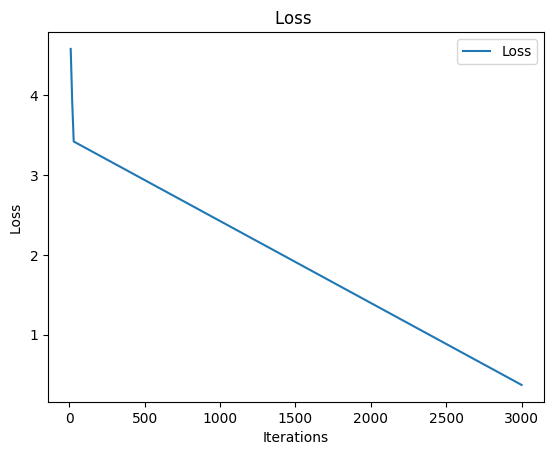

In [8]:
import matplotlib.pyplot as plt

iterations = [10, 20, 30, 3000]
loss_values = [4.58, 3.92, 3.42, 0.37]

plt.plot(iterations, loss_values, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss ')
plt.legend()
plt.title('Loss ')
plt.show()


In [ ]:
#Saving the weight to the Drive
gpt2.copy_checkpoint_to_gdrive(run_name='run1')

Model initialization

In [ ]:
#Getting the model weights from Google Drive
gpt2.copy_checkpoint_from_gdrive(run_name='run1')

In [ ]:
#Starting the session and loading the model
import tensorflow as tf
tf.compat.v1.reset_default_graph()
sess = gpt2.start_tf_sess()
#gpt2.load_gpt2(sess, run_name='run1',reuse=True)
gpt2.load_gpt2(sess, run_name='run1')

Loading checkpoint checkpoint/run1/model-3000


Obtaining the results

In [ ]:
#Splitting the validation set into question and answers sets
val_questions = []
for i in range(100):
  val_questions.append(val[i].split('\n')[0])

val_answers = []
for i in range(100):
  val_answers.append(val[i].split('\n')[1])


In [ ]:
#print(val_questions)
#print(val_answers)
#print(val)

In [ ]:
#Generating the answers to questions from the validation set
eval_answers = []
for question in val_questions[0:20]:
  answer = gpt2.generate(
                sess,
                length=15,
                temperature=0.1,
                top_k=40,
                prefix=question,
                nsamples=16,
                batch_size=8,
                return_as_list=True
                )[0]
  pair_answer=answer.split('\n\n')[0]
  single=pair_answer.split('\n')[1]
  eval_answers.append(single)

In [ ]:
#print and comprae results
for a in range(len(eval_answers)):
  print(val_questions[a])
  print(val_answers[a])
  print(eval_answers[a],"\n")
print(len(eval_answers))

How many people did Carlton have per km2 between 2012 and 2013?
9,000
16 

Where was there a minute of silence during the relay?
Ruijin, Jiangxi
a moment of silence 

Why did a regional referendum in 1996 to merge Berlin with surrounding Brandenburg fail?
failed to reach the necessary majority vote in Brandenburg
failed to result in a central government 

Into what 3 lists are legislation subjects divided in India?
Union List, State List and Concurrent List
the Constitution Act, 1931 

When did the FBI first appear in popular media?
1930s
1966 

What term did Lee use to describe the town's courthouse?
Gothic
"the vermilion penance of the town's character" 

In which chapel does King George's body lie in today? 
King George VI Memorial Chapel
Church of England Maro 

As of December 2012, Somalia did not have systematic what?
internet blocking or filtering
consensus 

Where is the Tibet Autonomous Region?
western and central Tibet
between China and Tibet 

What was the world's first arti

In [ ]:
#Computing Precision, Recal, F1-Score
num_c = []
num_p = []
num_g = []

for a in range(len(eval_answers)):
  #common = Counter((val_answers[a].split('\n')[1]).split()) & Counter((eval_answers[a].split('\n')[1]).split()) # tokens shared between gold and predicted answers
  common = Counter(val_answers[a].split()) & Counter(eval_answers[a].split()) # tokens shared between gold and predicted answers
  num_common = sum(common.values())


  num_pred = len(str(eval_answers[a]).split()) # the number of predicted tokens

  num_gold = len(str(val_answers[a]).split()) # the number of gold tokens

  num_c.append(num_common)
  num_p.append(num_pred)
  num_g.append(num_gold)

precision = 1.0 * sum(num_c) / sum(num_p) # the num of tokens shared between gold and predicted answers / the num of predicted tokens
recall = 1.0 * sum(num_c) / sum(num_g) # the num of tokens shared between gold and predicted answers / the num of gold tokens
if (precision + recall) > 0.001:
  f1_score = (2 * precision * recall) / (precision + recall)
else:
  f1_score= 'devided by zero'

In [ ]:
print("precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

precision: 0.11475409836065574
recall: 0.11666666666666667
f1_score: 0.11570247933884299
